In [22]:
import pandas as pd
netflix_data = pd.read_csv("netflix_titles.csv")
netflix_data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [23]:
#

missing_values = netflix_data.isnull().sum()

# Extracting year from date_added
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['year_added'] = netflix_data['date_added'].dt.year

# Checking the first few rows after modification
first_rows_modified = netflix_data.head()

missing_values, first_rows_modified


(show_id            0
 type               0
 title              0
 director        2634
 cast             825
 country          831
 date_added        10
 release_year       0
 rating             4
 duration           3
 listed_in          0
 description        0
 dtype: int64,
   show_id     type                  title         director  \
 0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
 1      s2  TV Show          Blood & Water              NaN   
 2      s3  TV Show              Ganglands  Julien Leclercq   
 3      s4  TV Show  Jailbirds New Orleans              NaN   
 4      s5  TV Show           Kota Factory              NaN   
 
                                                 cast        country  \
 0                                                NaN  United States   
 1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
 2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
 3                                                NaN

In [24]:
# Addressing missing values

# Filling missing values for 'director', 'cast', and 'country' with 'Unknown'
netflix_data['director'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Unknown', inplace=True)
netflix_data['country'].fillna('Unknown', inplace=True)

# For 'date_added', we'll drop rows where this is missing as it's crucial for trend analysis
netflix_data.dropna(subset=['date_added'], inplace=True)

# For 'rating' and 'duration', filling missing values with the mode (most frequent value)
rating_mode = netflix_data['rating'].mode()[0]
duration_mode = netflix_data['duration'].mode()[0]

netflix_data['rating'].fillna(rating_mode, inplace=True)
netflix_data['duration'].fillna(duration_mode, inplace=True)

# Check if all missing values are addressed
remaining_missing_values = netflix_data.isnull().sum()
remaining_missing_values


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

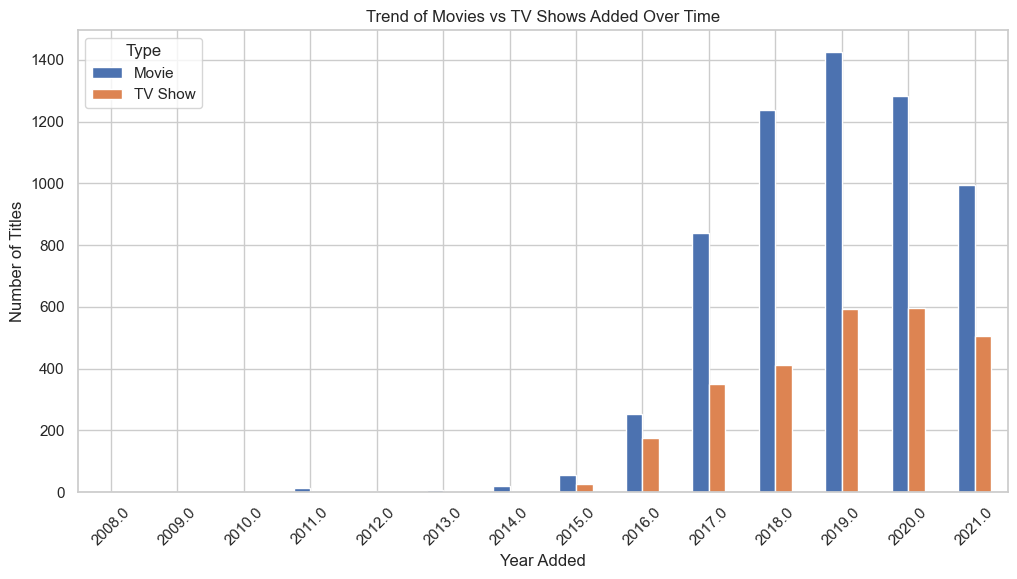

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization style
sns.set(style="whitegrid")

# Trend analysis: Movies vs TV Shows over time

# Counting the number of movies and TV shows added each year
content_trend = netflix_data.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Plotting the trend
plt.figure(figsize=(12, 6))
content_trend.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Trend of Movies vs TV Shows Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


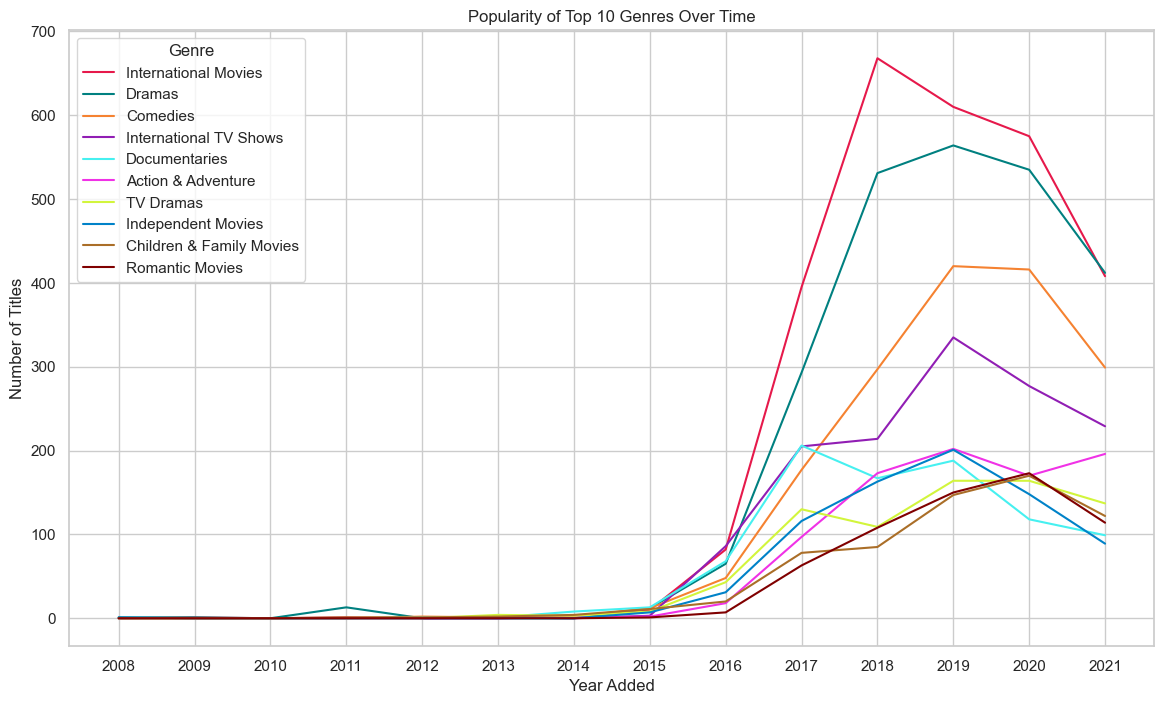

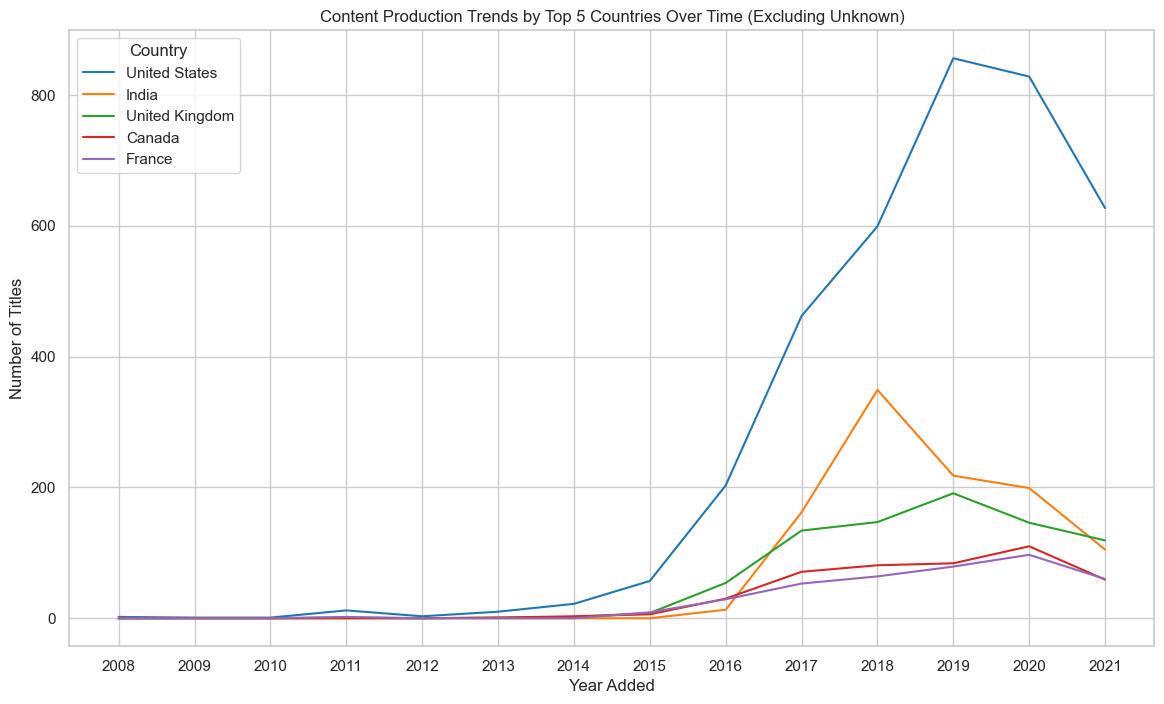

In [42]:
import numpy as np

# Genre Analysis: Popularity of different genres over time

# Splitting the 'listed_in' column into individual genres
genre_data = netflix_data.copy()
genre_data['listed_in'] = genre_data['listed_in'].str.split(', ')
genre_data = genre_data.explode('listed_in')

# Counting the occurrences of each genre per year
genre_trend = genre_data.groupby(['year_added', 'listed_in']).size().unstack().fillna(0)

# Plotting the top 10 genres over time
top_genres = genre_trend.sum().sort_values(ascending=False).head(10).index
genre_trend_top = genre_trend[top_genres]

# Setting a more diverse and vibrant color palette
palette = sns.color_palette("bright", 10)
colors = [
    "#e6194B", "#008080", "#f58231", "#911eb4", "#46f0f0", 
    "#f032e6", "#d2f53c", "#0082c8", "#aa6e28", "#800000"
]
genre_color_map = dict(zip(top_genres, colors))

fig, ax = plt.subplots(figsize=(14, 8))

# Plotting each genre with its specific color
for genre, color in zip(top_genres, colors):
    ax.plot(genre_trend_top.index, genre_trend_top[genre], label=genre, color=color)

ax.set_title('Popularity of Top 10 Genres Over Time')
ax.set_xlabel('Year Added')
ax.set_ylabel('Number of Titles')
ax.set_xticks(np.arange(genre_trend_top.index.min(), genre_trend_top.index.max() + 1, 1.0))
ax.legend(title='Genre')
plt.show()
# Country-Specific Trends: Content production trends by country

# Counting the number of titles per country per year
country_data = netflix_data.copy()
country_data['country'] = country_data['country'].str.split(', ')
country_data = country_data.explode('country')

country_trend = country_data.groupby(['year_added', 'country']).size().unstack().fillna(0)

# Plotting the top 5 countries over time
top_countries = country_trend.sum().sort_values(ascending=False).head(5).index
country_trend_top = country_trend[top_countries]
# Excluding 'Unknown' from the analysis and re-plotting

# Removing 'Unknown' from the country data
filtered_country_trend = country_trend.drop('Unknown', axis=1, errors='ignore')

# Identifying the top 5 countries excluding 'Unknown'
top_countries_filtered = filtered_country_trend.sum().sort_values(ascending=False).head(5).index
country_trend_top_filtered = filtered_country_trend[top_countries_filtered]

# Replotting with only Matplotlib
fig, ax = plt.subplots(figsize=(14, 8))

# Generating a distinct color palette for the top 5 countries
top_countries_colors_filtered = sns.color_palette("tab10", n_colors=5).as_hex()

# Plotting each country with its specific color
for country, color in zip(top_countries_filtered, top_countries_colors_filtered):
    ax.plot(country_trend_top_filtered.index, country_trend_top_filtered[country], label=country, color=color)

ax.set_title('Content Production Trends by Top 5 Countries Over Time (Excluding Unknown)')
ax.set_xlabel('Year Added')
ax.set_ylabel('Number of Titles')
ax.set_xticks(np.arange(country_trend_top_filtered.index.min(), country_trend_top_filtered.index.max() + 1, 1.0))
ax.legend(title='Country')
plt.show()


C:\Users\Hieut\AppData\Local\Temp\ipykernel_14460\10171966.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration_numeric'] = movies_data['duration'].str.extract(r'(\d+)').astype(int)
C:\Users\Hieut\AppData\Local\Temp\ipykernel_14460\10171966.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_data['seasons_numeric'] = tv_shows_data['duration'].str.extract(r'(\d+)').astype(int)


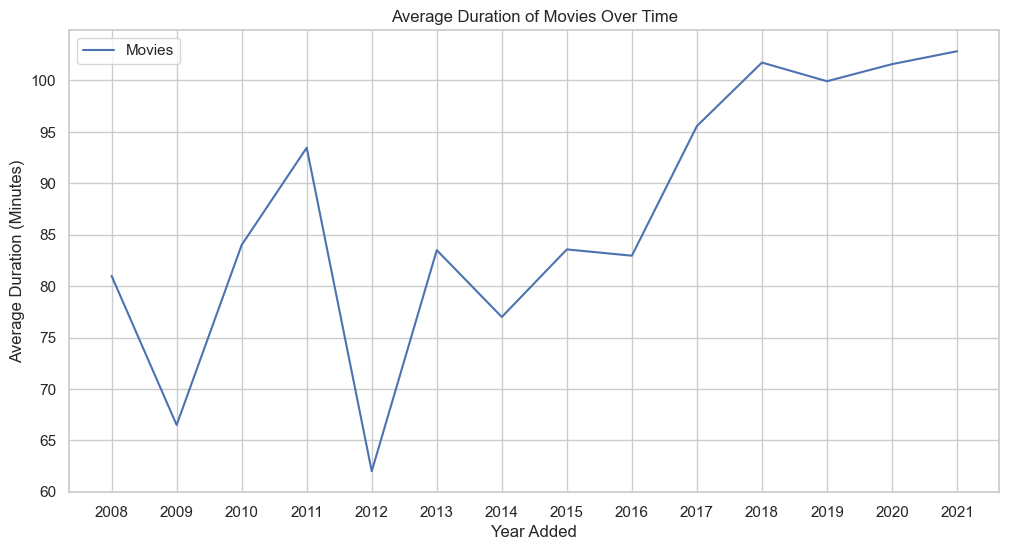

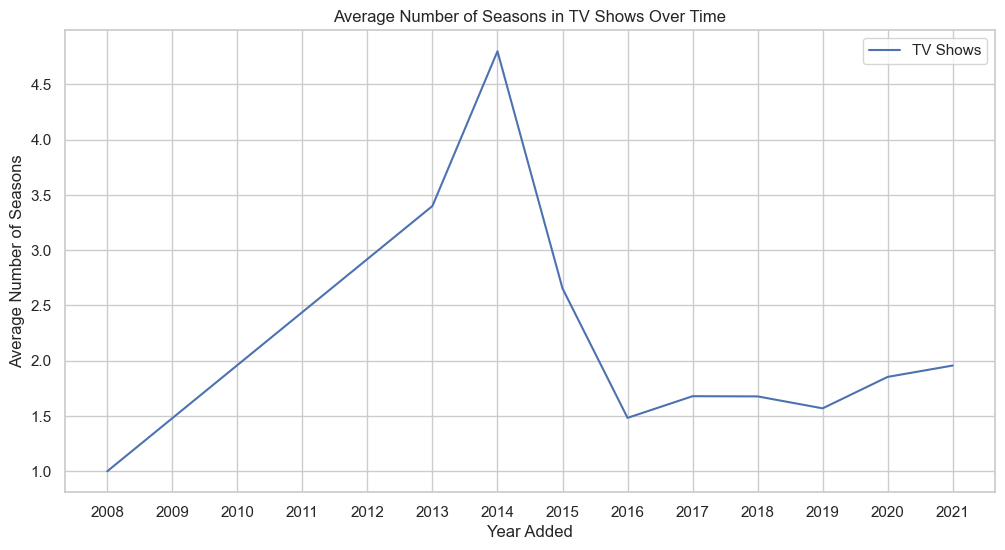

In [27]:
# Duration/Seasons Analysis: Trends in movie durations and TV show seasons

# Separate data into movies and TV shows
movies_data = netflix_data[netflix_data['type'] == 'Movie']
tv_shows_data = netflix_data[netflix_data['type'] == 'TV Show']

# Extracting numeric duration for movies
movies_data['duration_numeric'] = movies_data['duration'].str.extract(r'(\d+)').astype(int)

# Extracting numeric seasons for TV shows
tv_shows_data['seasons_numeric'] = tv_shows_data['duration'].str.extract(r'(\d+)').astype(int)

# Analyzing trends in movie durations
duration_trend_movies = movies_data.groupby('year_added')['duration_numeric'].mean()

# Analyzing trends in TV show seasons
seasons_trend_tv_shows = tv_shows_data.groupby('year_added')['seasons_numeric'].mean()

# Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=duration_trend_movies.index, y=duration_trend_movies.values, label='Movies')
plt.title('Average Duration of Movies Over Time')
plt.xlabel('Year Added')
plt.ylabel('Average Duration (Minutes)')
plt.xticks(np.arange(duration_trend_movies.index.min(), duration_trend_movies.index.max() + 1, 1.0))
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=seasons_trend_tv_shows.index, y=seasons_trend_tv_shows.values, label='TV Shows')
plt.title('Average Number of Seasons in TV Shows Over Time')
plt.xlabel('Year Added')
plt.ylabel('Average Number of Seasons')
plt.xticks(np.arange(seasons_trend_tv_shows.index.min(), seasons_trend_tv_shows.index.max() + 1, 1.0))
plt.legend()
plt.show()


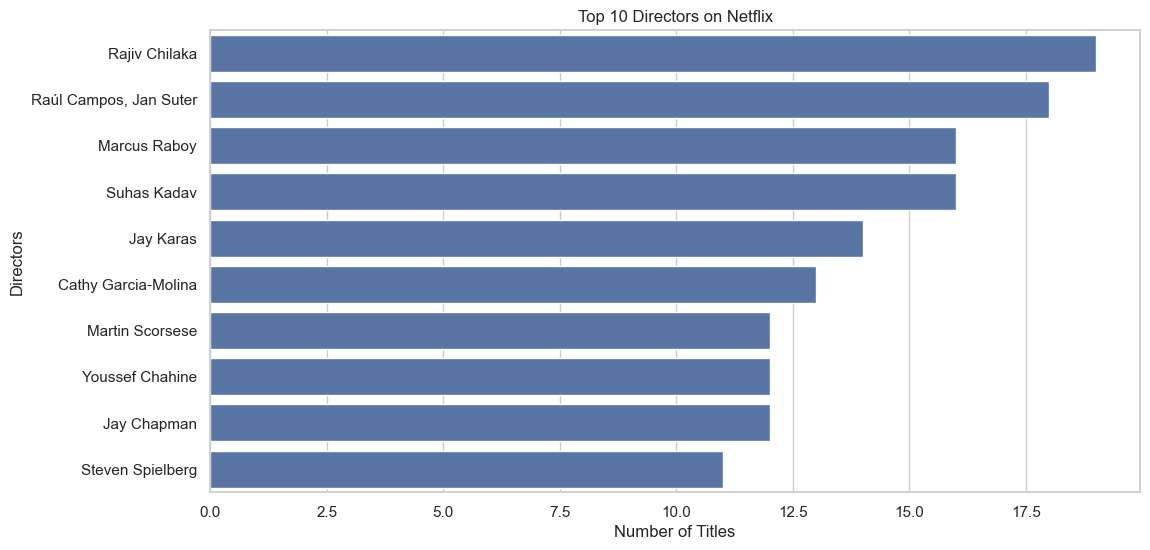

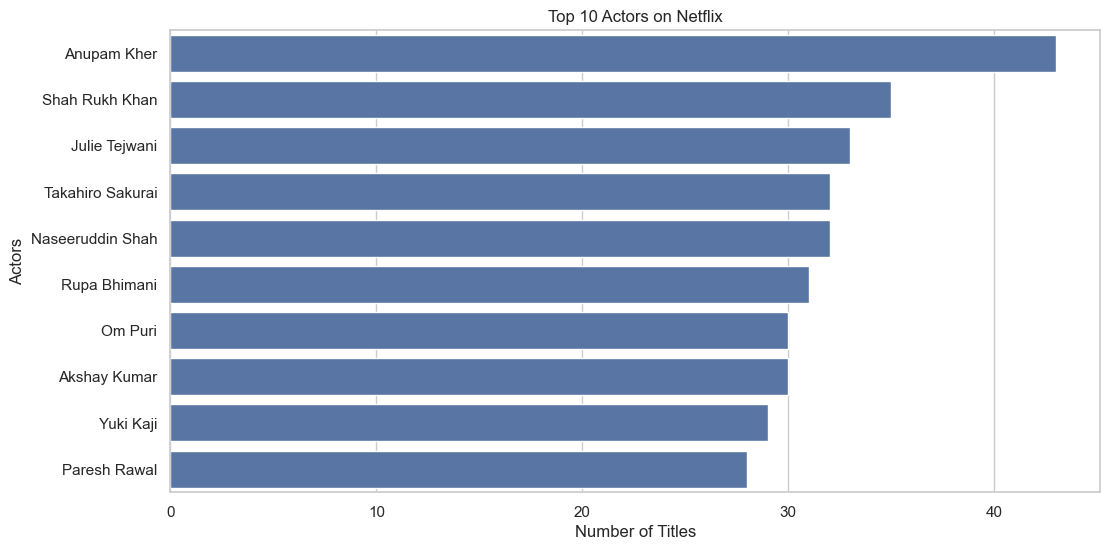

In [28]:
# Key Figures Analysis: Involvement of specific directors or actors

# Analyzing the most frequent directors on Netflix
top_directors = netflix_data[netflix_data['director'] != 'Unknown']['director'].value_counts().head(10)

# Analyzing the most frequent actors on Netflix
top_actors = netflix_data[netflix_data['cast'] != 'Unknown']['cast'].str.split(', ').explode().value_counts().head(10)

# Plotting the top directors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Directors')
plt.show()

# Plotting the top actors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actors')
plt.show()


In [29]:
# Feature Engineering

# Content Age: Calculating the age of the content when it was added to Netflix
netflix_data['content_age'] = netflix_data['year_added'] - netflix_data['release_year']

# Seasonal Analysis: Extracting month and determining season
netflix_data['month_added'] = netflix_data['date_added'].dt.month
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 
           6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
netflix_data['season_added'] = netflix_data['month_added'].map(seasons)

# Word Count of Descriptions: Counting the number of words in the description
netflix_data['description_word_count'] = netflix_data['description'].apply(lambda x: len(x.split()))

# Checking the first few rows with the new features
netflix_data[['title', 'content_age', 'season_added', 'description_word_count']].head()

,title,content_age,season_added,description_word_count
0,Dick Johnson Is Dead,1.0,Fall,27
1,Blood & Water,0.0,Fall,27
2,Ganglands,0.0,Fall,27
3,Jailbirds New Orleans,0.0,Fall,24
4,Kota Factory,0.0,Fall,24


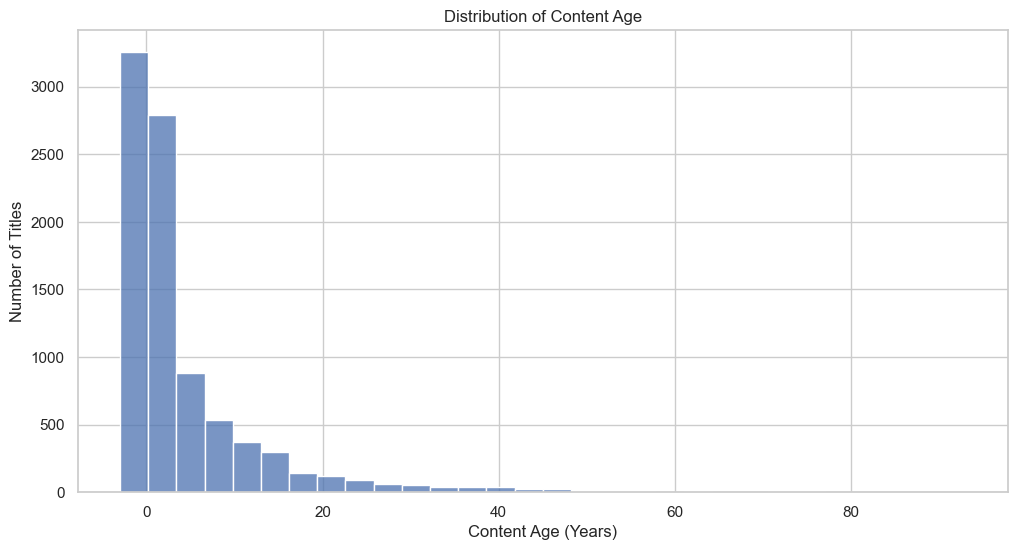

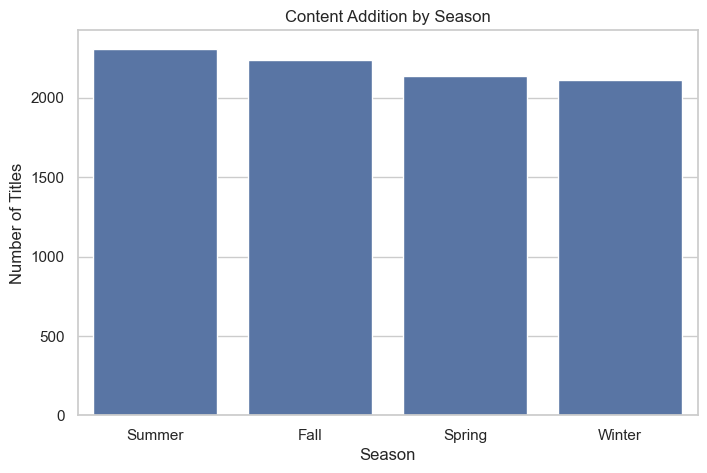

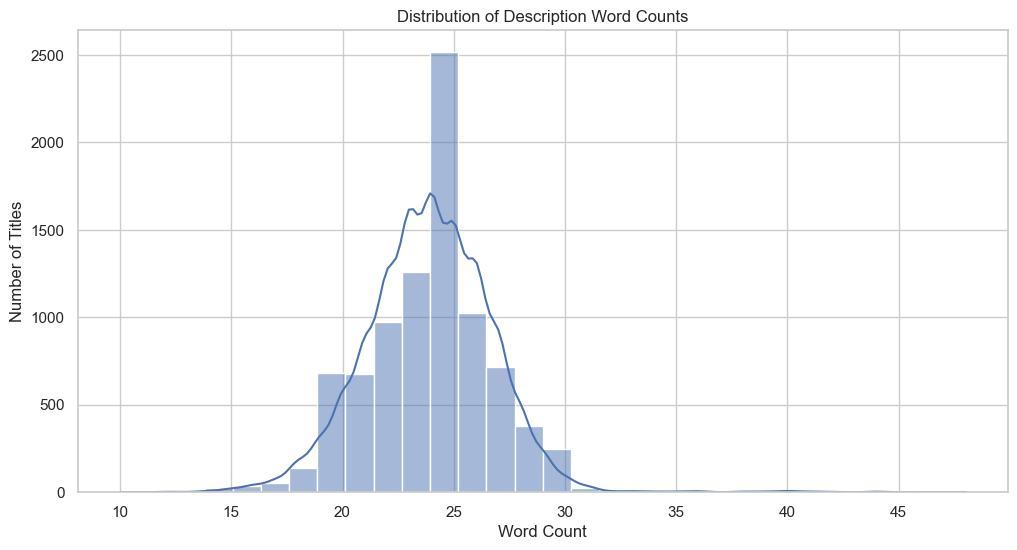

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing Content Age
plt.figure(figsize=(12, 6))
sns.histplot(netflix_data['content_age'], bins=30, kde=False)
plt.title('Distribution of Content Age')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

# Analyzing Seasonal Trends in Content Addition
season_counts = netflix_data['season_added'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title('Content Addition by Season')
plt.xlabel('Season')
plt.ylabel('Number of Titles')
plt.show()

# Analyzing Description Word Count
plt.figure(figsize=(12, 6))
sns.histplot(netflix_data['description_word_count'], bins=30, kde=True)
plt.title('Distribution of Description Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of Titles')
plt.show()


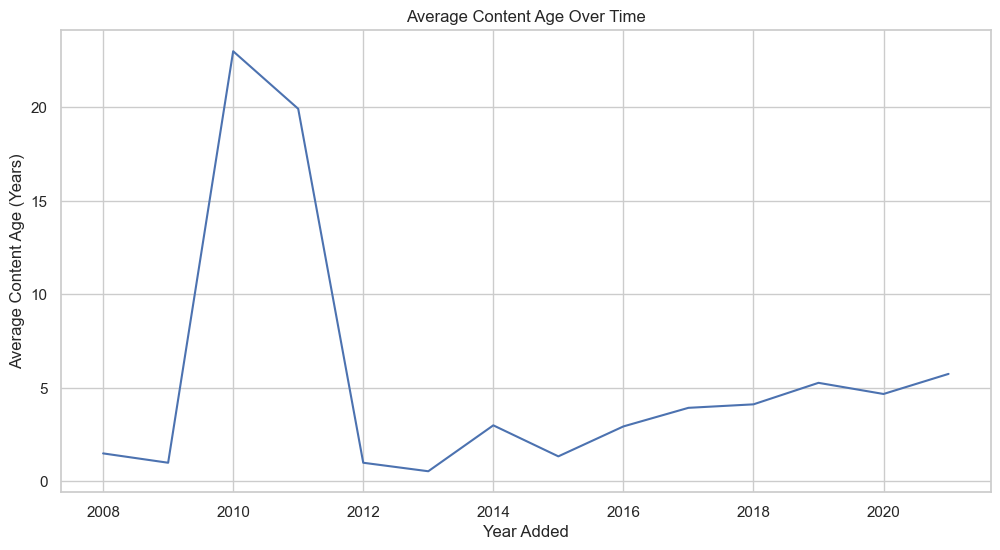

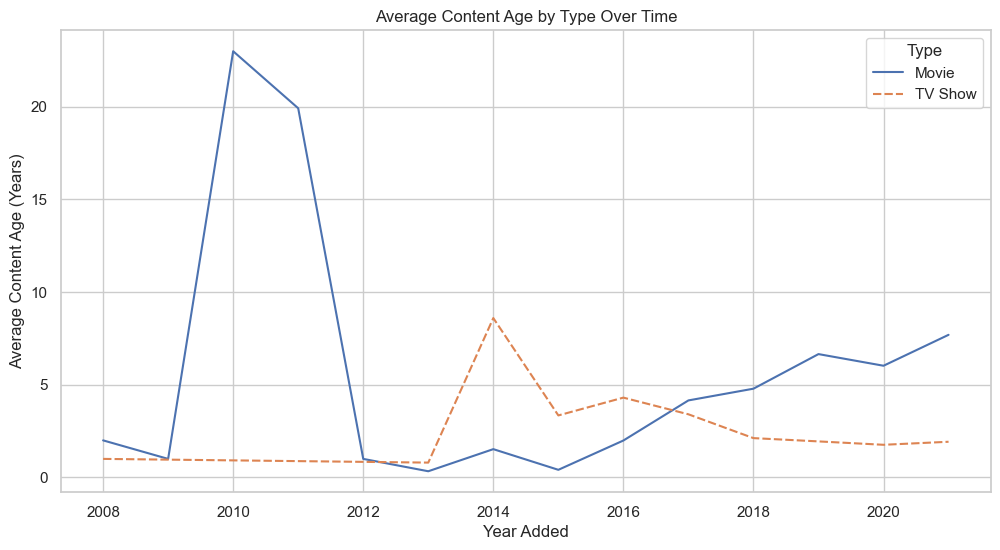

In [31]:
# Content Age Analysis

# Separate data into movies and TV shows
movies_data = netflix_data[netflix_data['type'] == 'Movie']
tv_shows_data = netflix_data[netflix_data['type'] == 'TV Show']

# Content Age Trend Over Time
content_age_trend = netflix_data.groupby('year_added')['content_age'].mean()

# Content Age by Type
content_age_by_type = netflix_data.groupby(['year_added', 'type'])['content_age'].mean().unstack()

# Plotting Content Age Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_age_trend)
plt.title('Average Content Age Over Time')
plt.xlabel('Year Added')
plt.ylabel('Average Content Age (Years)')
plt.show()

# Plotting Content Age by Type
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_age_by_type)
plt.title('Average Content Age by Type Over Time')
plt.xlabel('Year Added')
plt.ylabel('Average Content Age (Years)')
plt.legend(title='Type')
plt.show()

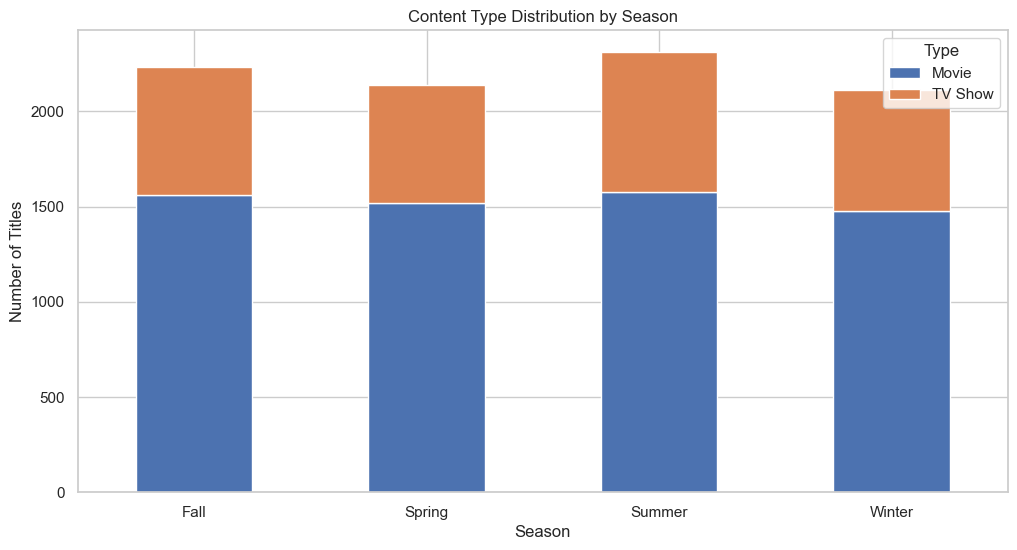

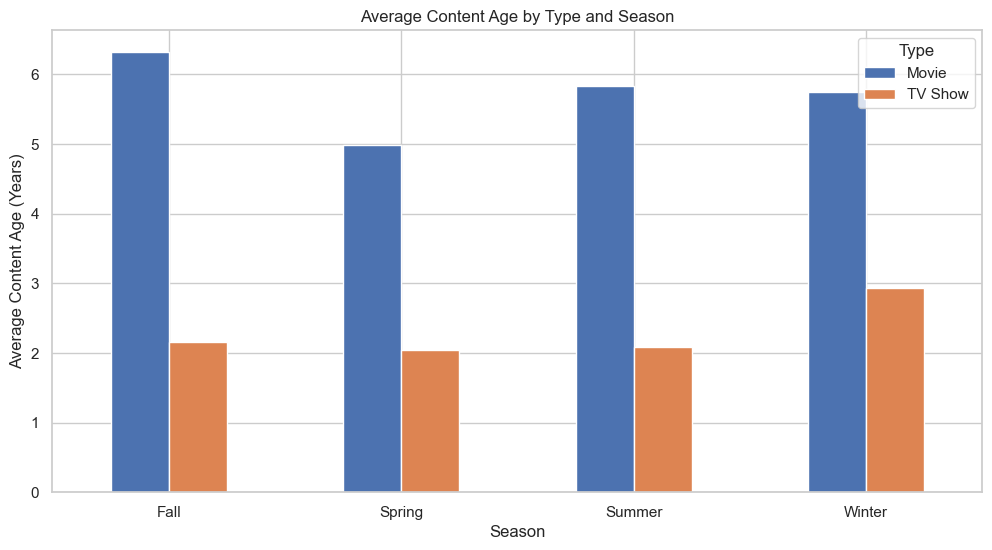

In [32]:
# Seasonal Trends Analysis

# Analyzing Content Type by Season
content_type_season = netflix_data.groupby(['season_added', 'type']).size().unstack()

# Analyzing Content Age by Season
content_age_season = netflix_data.groupby(['season_added', 'type'])['content_age'].mean().unstack()

# Plotting Content Type by Season
plt.figure(figsize=(12, 6))
content_type_season.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Content Type Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.legend(title='Type')
plt.show()

# Plotting Content Age by Season
plt.figure(figsize=(12, 6))
content_age_season.plot(kind='bar', ax=plt.gca())
plt.title('Average Content Age by Type and Season')
plt.xlabel('Season')
plt.ylabel('Average Content Age (Years)')
plt.xticks(rotation=0)
plt.legend(title='Type')
plt.show()

C:\Users\Hieut\AppData\Local\Temp\ipykernel_14460\1649713993.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_data['seasons_numeric'] = tv_shows_data['duration'].str.extract(r'(\d+)').astype(int)
C:\Users\Hieut\AppData\Local\Temp\ipykernel_14460\1649713993.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration_numeric'] = movies_data['duration'].str.extract(r'(\d+)').astype(int)


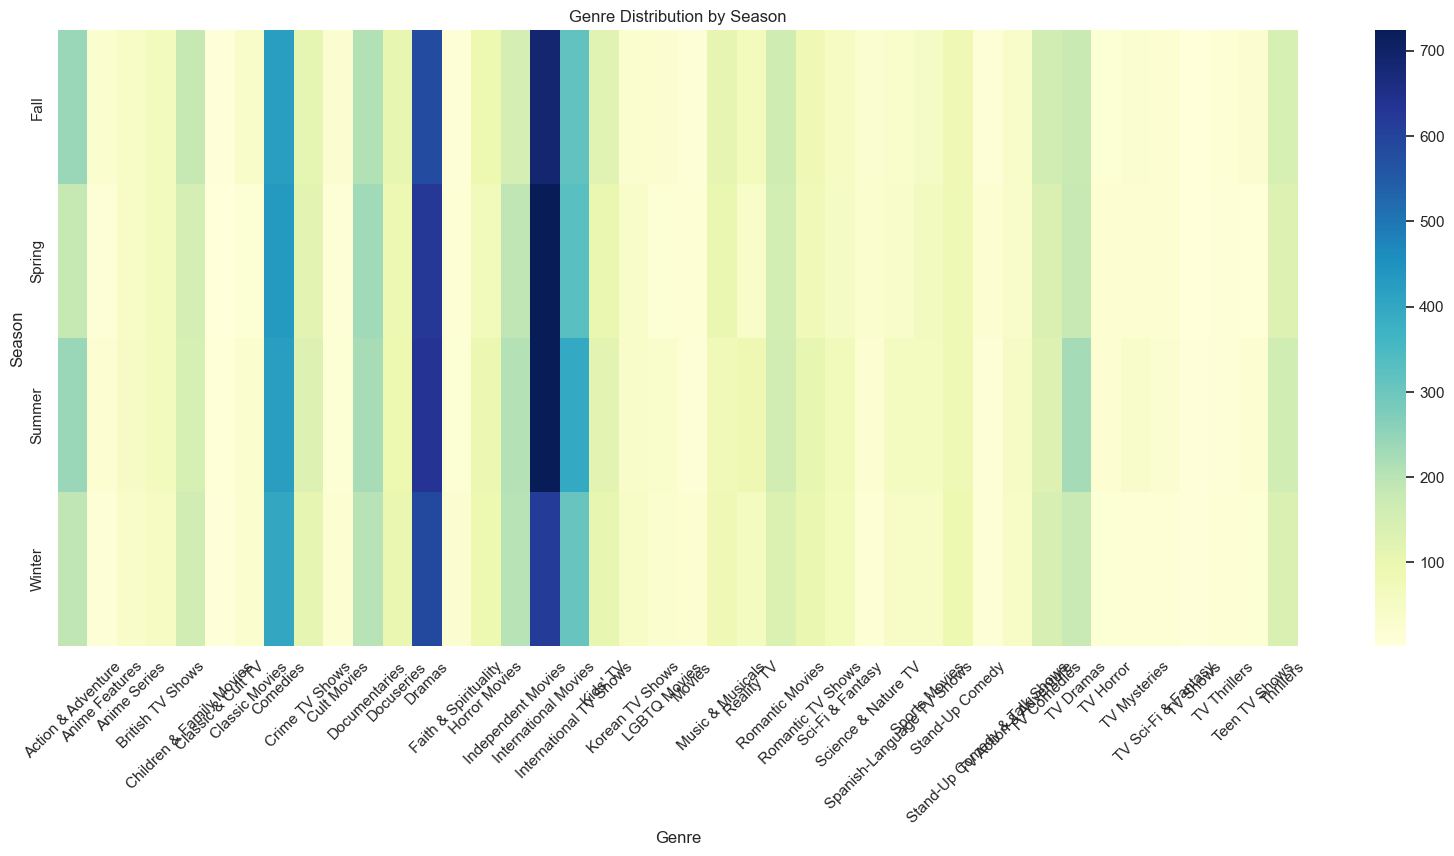

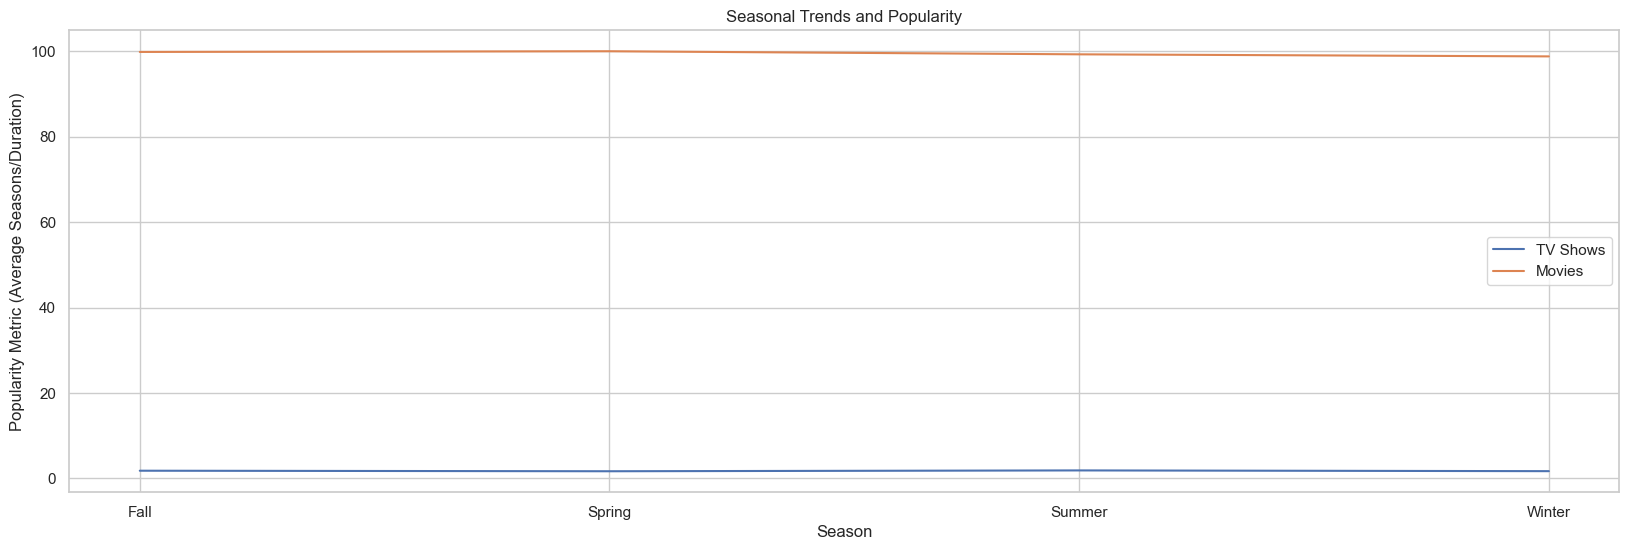

In [33]:
# Recreating the 'season_added' feature
netflix_data['month_added'] = netflix_data['date_added'].dt.month
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 
           6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
netflix_data['season_added'] = netflix_data['month_added'].map(seasons)

# Genre Distribution by Season
# Splitting genres for analysis
genre_season_data = netflix_data.copy()
genre_season_data['listed_in'] = genre_season_data['listed_in'].str.split(', ')
genre_season_data = genre_season_data.explode('listed_in')
# Aggregating by genre and season
genre_season_trend = genre_season_data.groupby(['season_added', 'listed_in']).size().unstack().fillna(0)

# Seasonal Trends and Popularity
# Separate data into movies and TV shows
movies_data = netflix_data[netflix_data['type'] == 'Movie']
tv_shows_data = netflix_data[netflix_data['type'] == 'TV Show']

# Extracting numeric seasons for TV shows and numeric duration for movies
tv_shows_data['seasons_numeric'] = tv_shows_data['duration'].str.extract(r'(\d+)').astype(int)
movies_data['duration_numeric'] = movies_data['duration'].str.extract(r'(\d+)').astype(int)

# Popularity metric for TV Shows (average number of seasons)
popularity_tv_season = tv_shows_data.groupby(['season_added'])['seasons_numeric'].mean()

# Popularity metric for Movies (average duration)
popularity_movie_season = movies_data.groupby(['season_added'])['duration_numeric'].mean()

# Plotting Genre Distribution by Season
plt.figure(figsize=(20, 8))
sns.heatmap(genre_season_trend, cmap="YlGnBu")
plt.title('Genre Distribution by Season')
plt.xlabel('Genre')
plt.ylabel('Season')
plt.xticks(rotation=45)
plt.show()

# Plotting Popularity by Season for TV Shows and Movies
plt.figure(figsize=(20, 6))
sns.lineplot(data=popularity_tv_season, label='TV Shows')
sns.lineplot(data=popularity_movie_season, label='Movies')
plt.title('Seasonal Trends and Popularity')
plt.xlabel('Season')
plt.ylabel('Popularity Metric (Average Seasons/Duration)')
plt.legend()
plt.show()


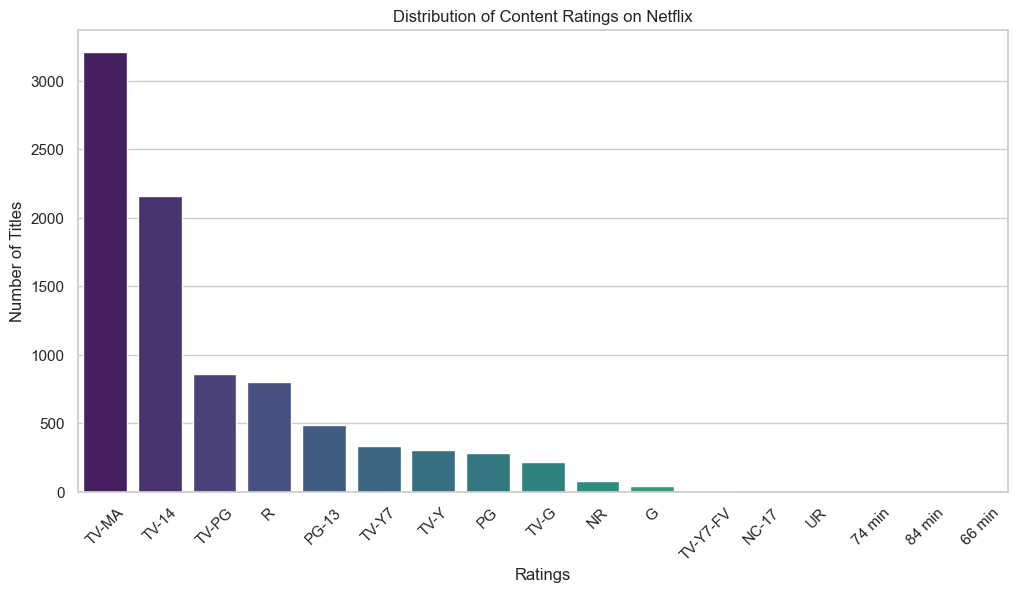

In [43]:
# Creating a graph for the distribution of content ratings (like PG-13, TV-14, etc.) in the Netflix dataset

# Counting the number of titles for each rating
rating_counts = netflix_data['rating'].value_counts()

# Plotting the distribution of ratings
plt.figure(figsize=(12, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Ratings')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


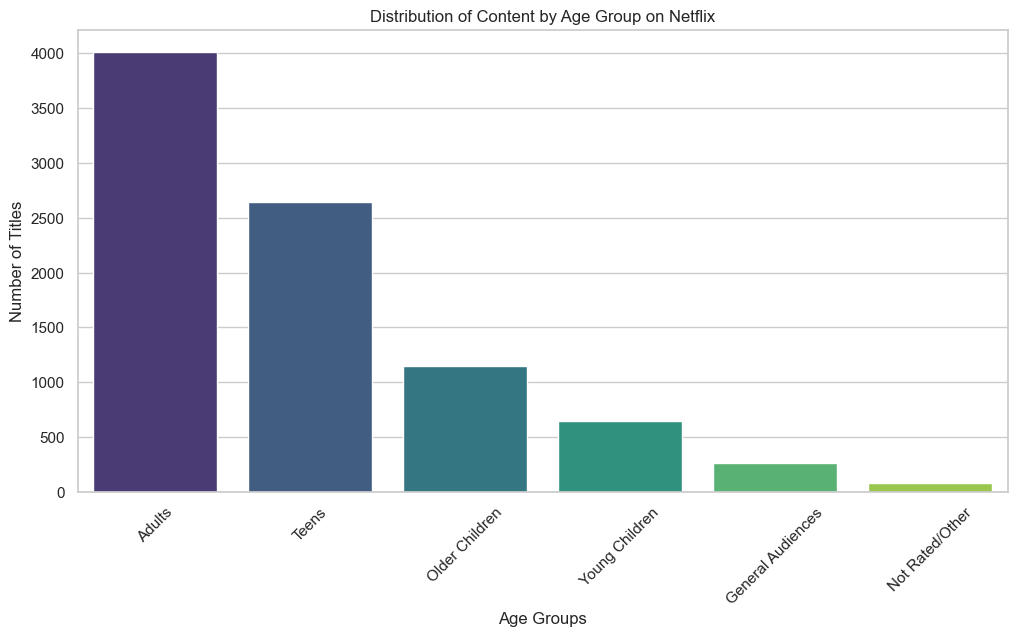

In [44]:
#more code if possible
# Grouping similar age-related ratings together (e.g., TV-14 and PG-13)

# Defining a mapping for similar age group ratings
age_group_mapping = {
    'TV-MA': 'Adults',
    'R': 'Adults',
    'NC-17': 'Adults',
    'TV-14': 'Teens',
    'PG-13': 'Teens',
    'PG': 'Older Children',
    'TV-PG': 'Older Children',
    'TV-G': 'General Audiences',
    'G': 'General Audiences',
    'TV-Y': 'Young Children',
    'TV-Y7': 'Young Children',
    'TV-Y7-FV': 'Young Children',
    'NR': 'Not Rated/Other',
    'UR': 'Not Rated/Other'
}

# Mapping the ratings to age groups
netflix_data['age_group'] = netflix_data['rating'].map(age_group_mapping).fillna('Not Rated/Other')

# Counting the number of titles for each age group
age_group_counts = netflix_data['age_group'].value_counts()

# Plotting the distribution of age groups
plt.figure(figsize=(12, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette="viridis")
plt.title('Distribution of Content by Age Group on Netflix')
plt.xlabel('Age Groups')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


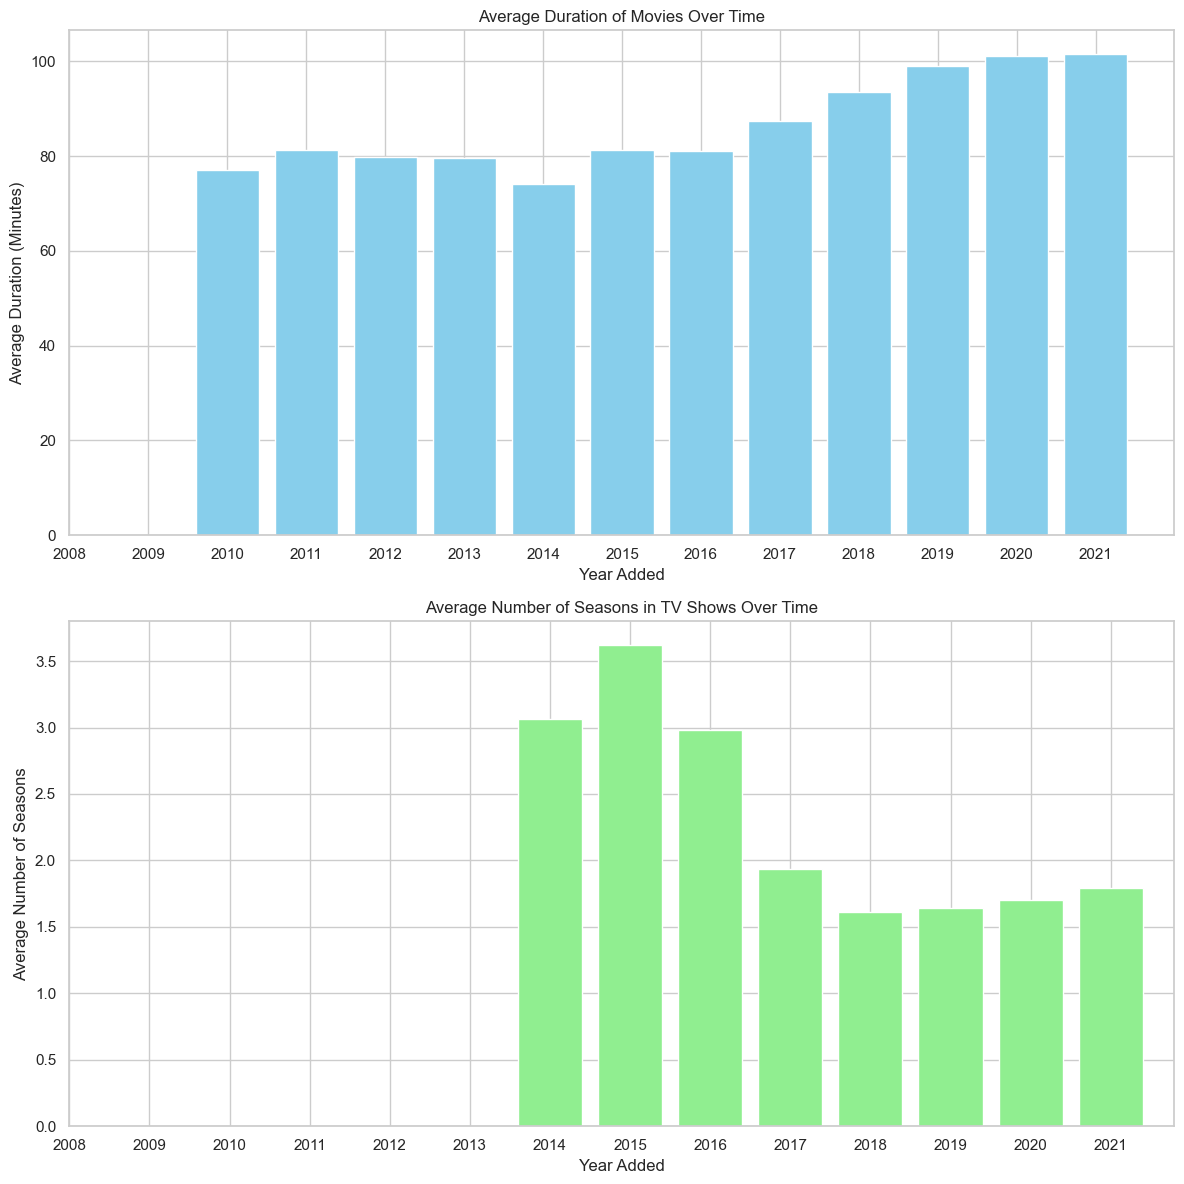

In [46]:
# Converting the line graphs into bar graphs and creating smoother charts

# For smoothing, we'll use rolling averages (window size can be adjusted for smoother or less smooth results)
window_size = 3  # Window size for rolling average

# Calculating rolling averages for movie durations and TV show seasons
rolling_avg_duration_movies = duration_trend_movies.rolling(window=window_size).mean()
rolling_avg_seasons_tv_shows = seasons_trend_tv_shows.rolling(window=window_size).mean()

# Plotting the trends as bar graphs with smoothed data
fig, axs = plt.subplots(2, figsize=(12, 12))

# Average Duration of Movies Over Time (Bar Graph)
axs[0].bar(rolling_avg_duration_movies.index, rolling_avg_duration_movies.values, color='skyblue')
axs[0].set_title('Average Duration of Movies Over Time')
axs[0].set_xlabel('Year Added')
axs[0].set_ylabel('Average Duration (Minutes)')
axs[0].set_xticks(np.arange(rolling_avg_duration_movies.index.min(), rolling_avg_duration_movies.index.max() + 1, 1.0))

# Average Number of Seasons in TV Shows Over Time (Bar Graph)
axs[1].bar(rolling_avg_seasons_tv_shows.index, rolling_avg_seasons_tv_shows.values, color='lightgreen')
axs[1].set_title('Average Number of Seasons in TV Shows Over Time')
axs[1].set_xlabel('Year Added')
axs[1].set_ylabel('Average Number of Seasons')
axs[1].set_xticks(np.arange(rolling_avg_seasons_tv_shows.index.min(), rolling_avg_seasons_tv_shows.index.max() + 1, 1.0))

plt.tight_layout()
plt.show()


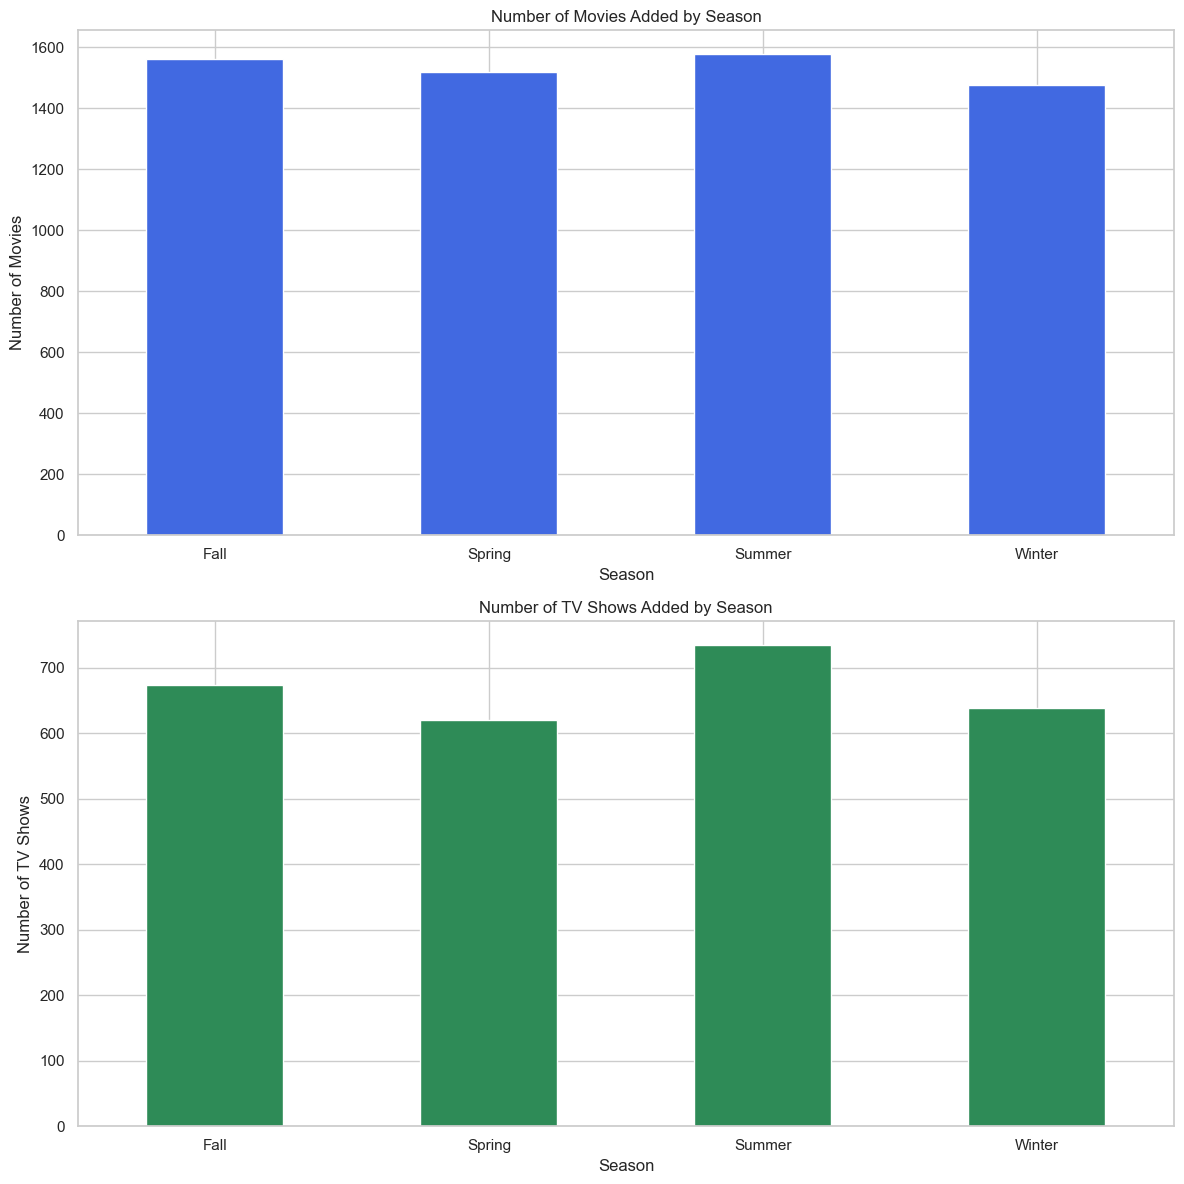

In [47]:
# Plotting Content Type by Season - Separated for Movies and TV Shows
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Movies
content_type_season['Movie'].plot(kind='bar', ax=ax1, color='royalblue')
ax1.set_title('Number of Movies Added by Season')
ax1.set_xlabel('Season')
ax1.set_ylabel('Number of Movies')
ax1.set_xticklabels(content_type_season.index, rotation=0)

# TV Shows
content_type_season['TV Show'].plot(kind='bar', ax=ax2, color='seagreen')
ax2.set_title('Number of TV Shows Added by Season')
ax2.set_xlabel('Season')
ax2.set_ylabel('Number of TV Shows')
ax2.set_xticklabels(content_type_season.index, rotation=0)

plt.tight_layout()
plt.show()


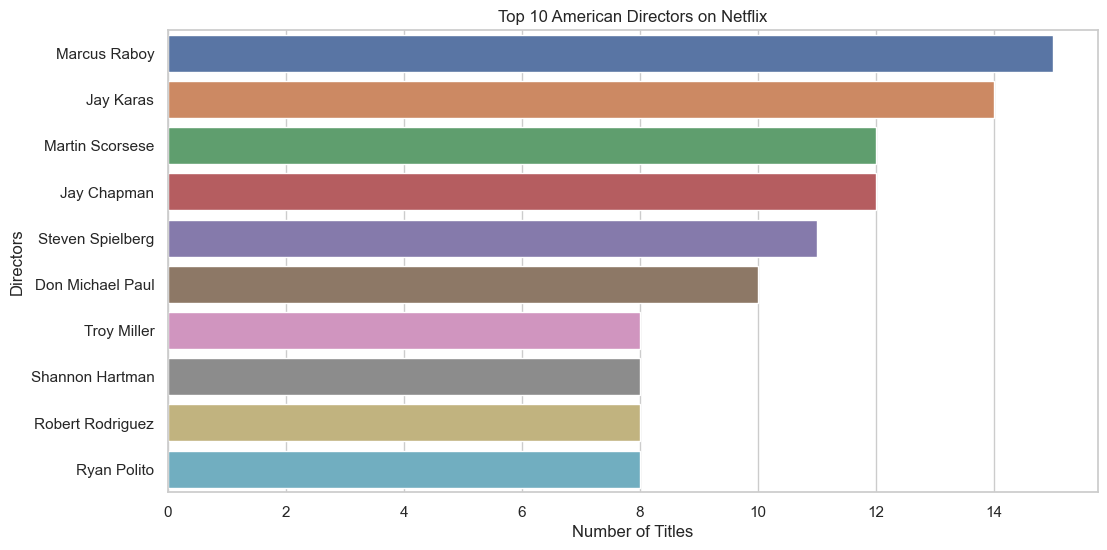

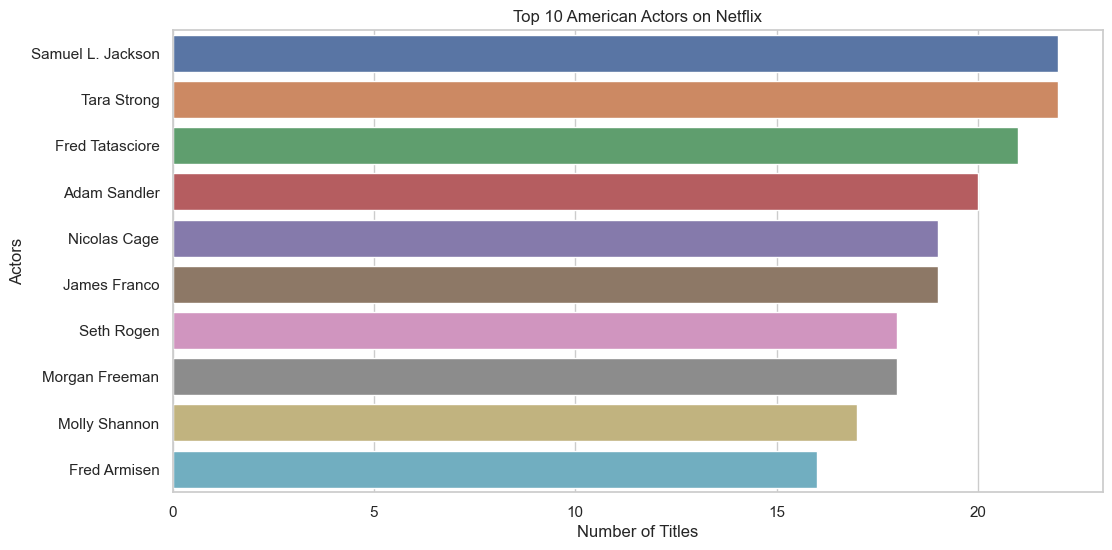

In [48]:
# Filtering for American actors and directors, then analyzing the most frequent ones

# Filtering American directors and actors
american_directors = netflix_data[(netflix_data['director'] != 'Unknown') & (netflix_data['country'].str.contains('United States'))]
american_actors = netflix_data[(netflix_data['cast'] != 'Unknown') & (netflix_data['country'].str.contains('United States'))]

# Analyzing the most frequent American directors
top_american_directors = american_directors['director'].value_counts().head(10)

# Analyzing the most frequent American actors
top_american_actors = american_actors['cast'].str.split(', ').explode().value_counts().head(10)

# Plotting the top American directors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_american_directors.values, y=top_american_directors.index)
plt.title('Top 10 American Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Directors')
plt.show()

# Plotting the top American actors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_american_actors.values, y=top_american_actors.index)
plt.title('Top 10 American Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actors')
plt.show()


C:\Users\Hieut\AppData\Local\Temp\ipykernel_14460\757270231.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korean_movies['duration_numeric'] = korean_movies['duration'].str.extract(r'(\d+)').fillna(0).astype(int)
C:\Users\Hieut\AppData\Local\Temp\ipykernel_14460\757270231.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korean_tv_shows['seasons_numeric'] = korean_tv_shows['duration'].str.extract(r'(\d+)').fillna(0).astype(int)


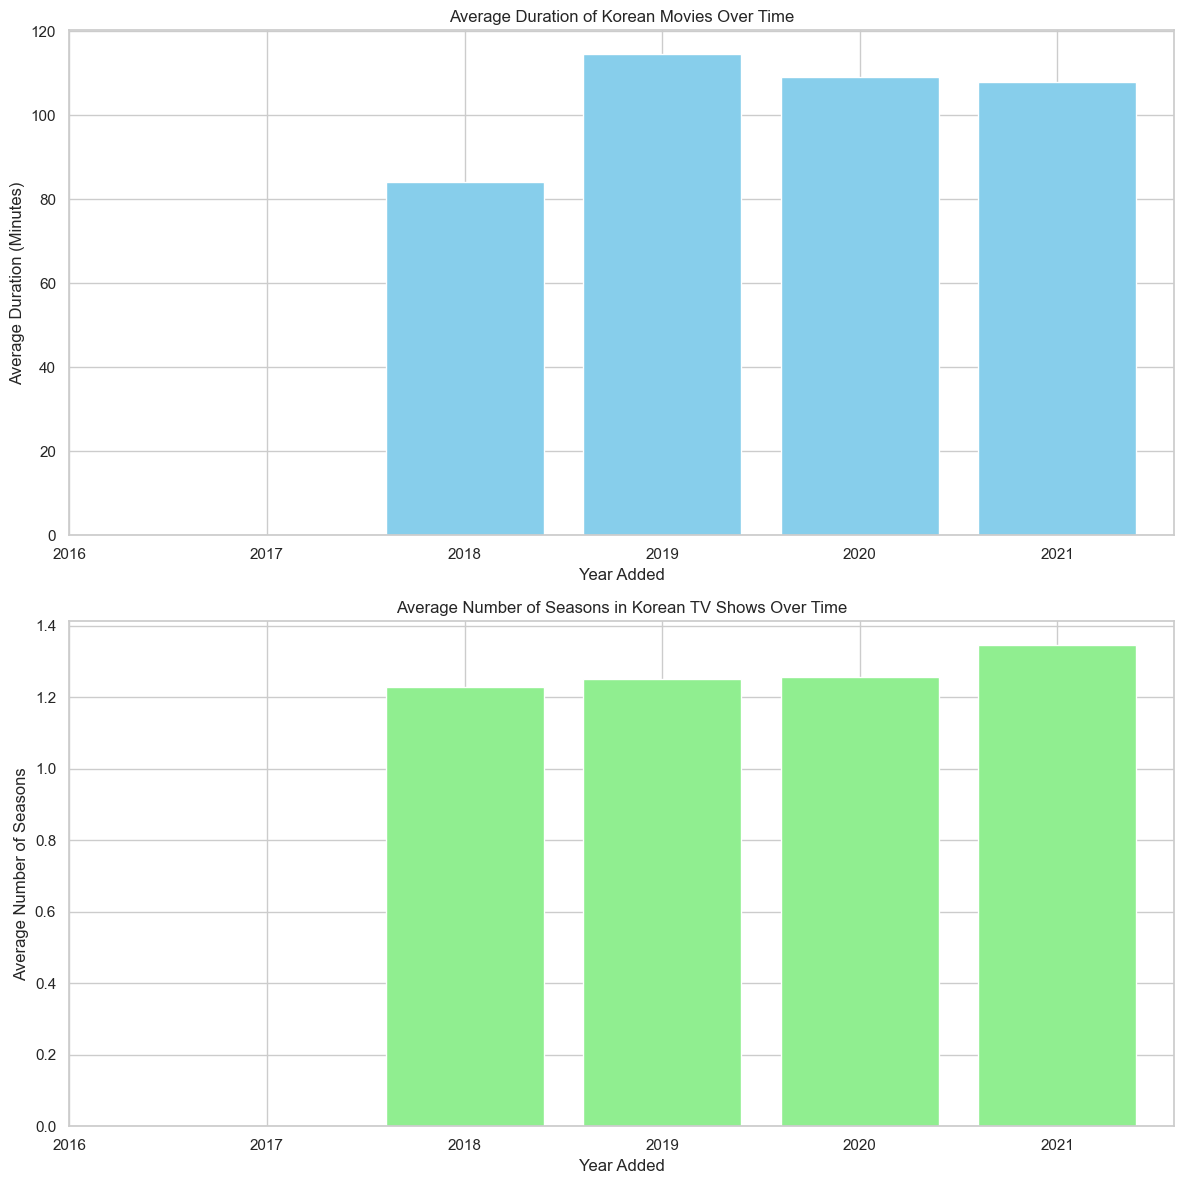

In [49]:
# Filtering for Korean movies and TV shows
korean_movies = netflix_data[(netflix_data['type'] == 'Movie') & (netflix_data['country'].str.contains('South Korea', na=False))]
korean_tv_shows = netflix_data[(netflix_data['type'] == 'TV Show') & (netflix_data['country'].str.contains('South Korea', na=False))]

# Extracting numeric duration for Korean movies
korean_movies['duration_numeric'] = korean_movies['duration'].str.extract(r'(\d+)').fillna(0).astype(int)

# Extracting numeric seasons for Korean TV shows
korean_tv_shows['seasons_numeric'] = korean_tv_shows['duration'].str.extract(r'(\d+)').fillna(0).astype(int)

# Calculating the trends for Korean movies and TV shows
duration_trend_korean_movies = korean_movies.groupby('year_added')['duration_numeric'].mean()
seasons_trend_korean_tv_shows = korean_tv_shows.groupby('year_added')['seasons_numeric'].mean()

# For smoothing, using rolling averages
window_size = 3  # Window size for rolling average

# Calculating rolling averages
rolling_avg_duration_korean_movies = duration_trend_korean_movies.rolling(window=window_size).mean()
rolling_avg_seasons_korean_tv_shows = seasons_trend_korean_tv_shows.rolling(window=window_size).mean()

# Plotting the trends as bar graphs with smoothed data for Korean content
fig, axs = plt.subplots(2, figsize=(12, 12))

# Average Duration of Korean Movies Over Time (Bar Graph)
axs[0].bar(rolling_avg_duration_korean_movies.index, rolling_avg_duration_korean_movies.values, color='skyblue')
axs[0].set_title('Average Duration of Korean Movies Over Time')
axs[0].set_xlabel('Year Added')
axs[0].set_ylabel('Average Duration (Minutes)')
axs[0].set_xticks(rolling_avg_duration_korean_movies.index)

# Average Number of Seasons in Korean TV Shows Over Time (Bar Graph)
axs[1].bar(rolling_avg_seasons_korean_tv_shows.index, rolling_avg_seasons_korean_tv_shows.values, color='lightgreen')
axs[1].set_title('Average Number of Seasons in Korean TV Shows Over Time')
axs[1].set_xlabel('Year Added')
axs[1].set_ylabel('Average Number of Seasons')
axs[1].set_xticks(rolling_avg_seasons_korean_tv_shows.index)

plt.tight_layout()
plt.show()


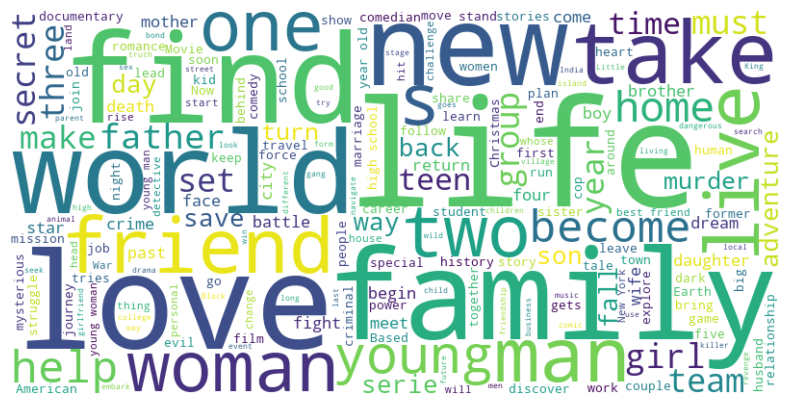

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combining all titles and descriptions into a single string
all_titles_descriptions = ' '.join(netflix_data['title'] + ' ' + netflix_data['description'])

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles_descriptions)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


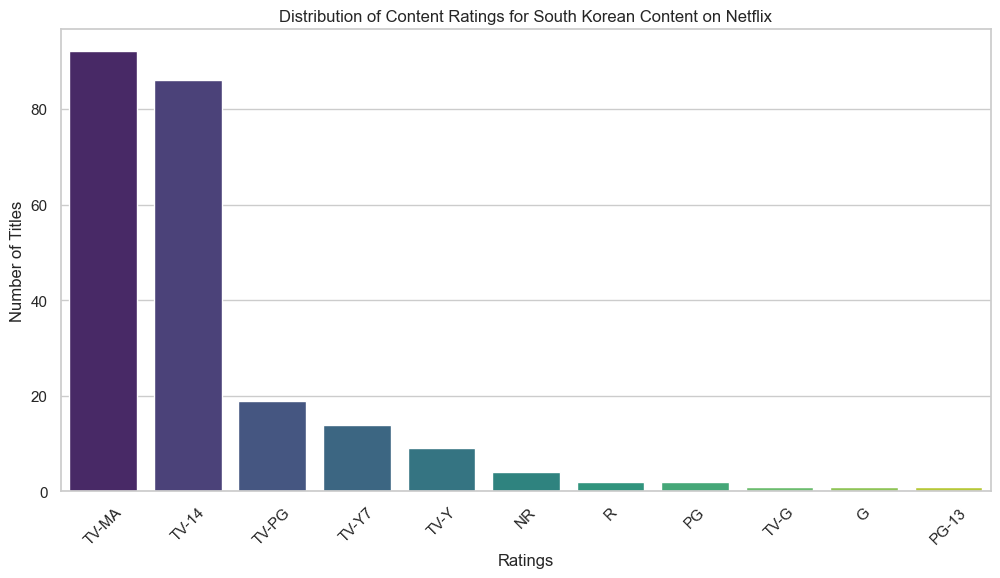

In [52]:
import seaborn as sns

# Filtering for South Korean content and creating a graph for the distribution of their content ratings

# Filtering South Korean content
south_korean_content = netflix_data[netflix_data['country'].str.contains('South Korea', na=False)]

# Counting the number of titles for each rating in South Korean content
south_korean_rating_counts = south_korean_content['rating'].value_counts()

# Plotting the distribution of ratings for South Korean content
plt.figure(figsize=(12, 6))
sns.barplot(x=south_korean_rating_counts.index, y=south_korean_rating_counts.values, palette="viridis")
plt.title('Distribution of Content Ratings for South Korean Content on Netflix')
plt.xlabel('Ratings')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


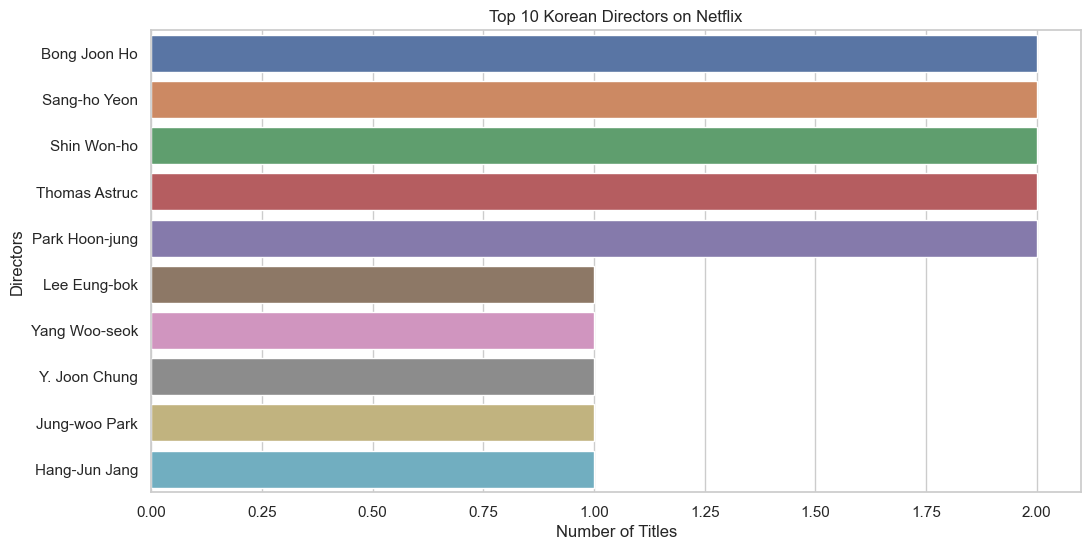

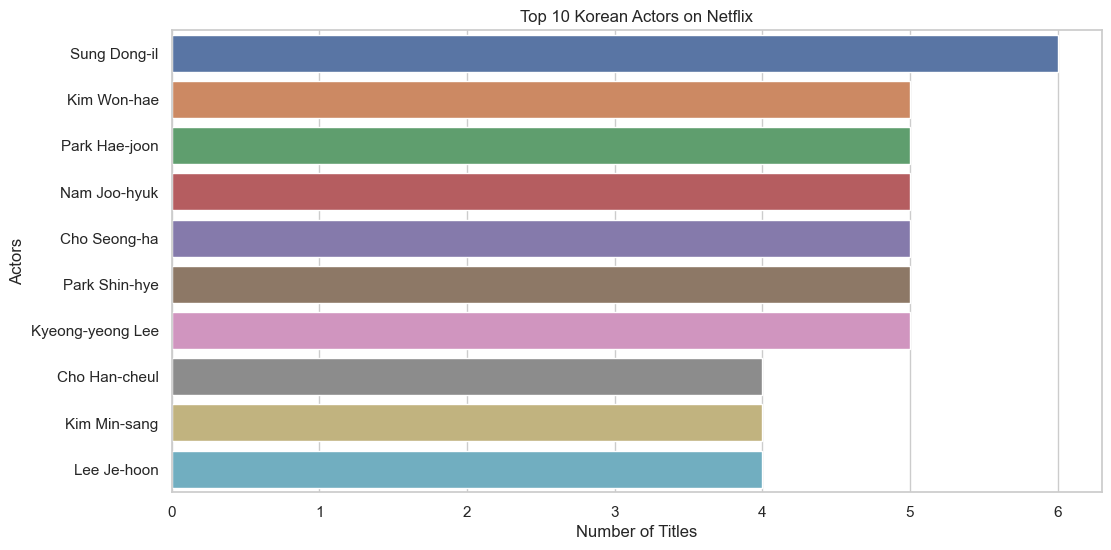

In [53]:
# Filtering for Korean actors and directors, then analyzing the most frequent ones

# Filtering Korean directors and actors
korean_directors = netflix_data[(netflix_data['director'] != 'Unknown') & (netflix_data['country'].str.contains('South Korea', na=False))]
korean_actors = netflix_data[(netflix_data['cast'] != 'Unknown') & (netflix_data['country'].str.contains('South Korea', na=False))]

# Analyzing the most frequent Korean directors
top_korean_directors = korean_directors['director'].value_counts().head(10)

# Analyzing the most frequent Korean actors
top_korean_actors = korean_actors['cast'].str.split(', ').explode().value_counts().head(10)

# Plotting the top Korean directors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_korean_directors.values, y=top_korean_directors.index)
plt.title('Top 10 Korean Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Directors')
plt.show()

# Plotting the top Korean actors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_korean_actors.values, y=top_korean_actors.index)
plt.title('Top 10 Korean Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actors')
plt.show()


[Text(0, 0, 'Fall'),
 Text(1, 0, 'Spring'),
 Text(2, 0, 'Summer'),
 Text(3, 0, 'Winter')]

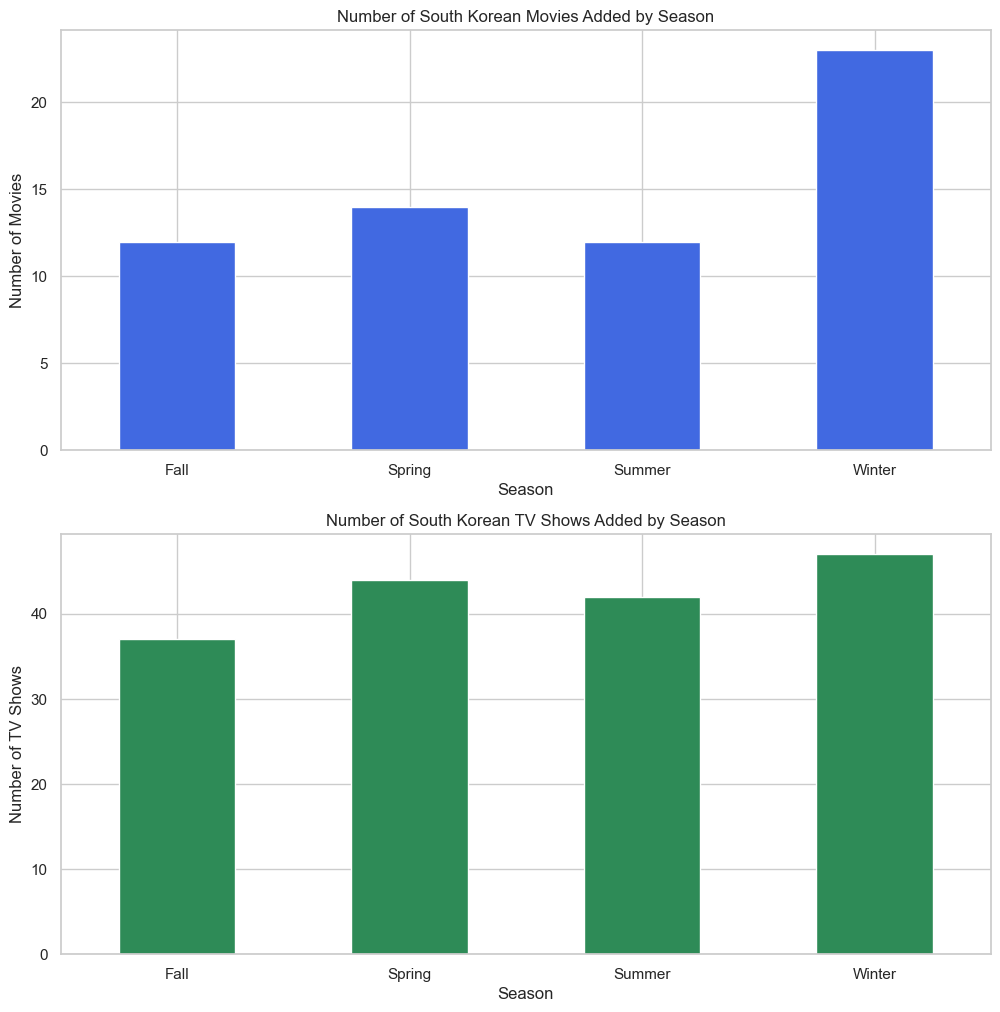

In [54]:
# Filtering content type by season for South Korean movies and TV shows

# Filtering South Korean movies and TV shows
korean_movies_season = netflix_data[(netflix_data['type'] == 'Movie') & (netflix_data['country'].str.contains('South Korea', na=False))]
korean_tv_shows_season = netflix_data[(netflix_data['type'] == 'TV Show') & (netflix_data['country'].str.contains('South Korea', na=False))]

# Grouping by season
korean_content_type_season = pd.concat([korean_movies_season, korean_tv_shows_season]).groupby(['season_added', 'type']).size().unstack()

# Plotting Content Type by Season for South Korean content
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# South Korean Movies
korean_content_type_season['Movie'].plot(kind='bar', ax=ax1, color='royalblue')
ax1.set_title('Number of South Korean Movies Added by Season')
ax1.set_xlabel('Season')
ax1.set_ylabel('Number of Movies')
ax1.set_xticklabels(korean_content_type_season.index, rotation=0)

# South Korean TV Shows
korean_content_type_season['TV Show'].plot(kind='bar', ax=ax2, color='seagreen')
ax2.set_title('Number of South Korean TV Shows Added by Season')
ax2.set_xlabel('Season')
ax2.set_ylabel('Number of TV Shows')
ax2.set_xticklabels(korean_content_type_season.index, rotation=0)




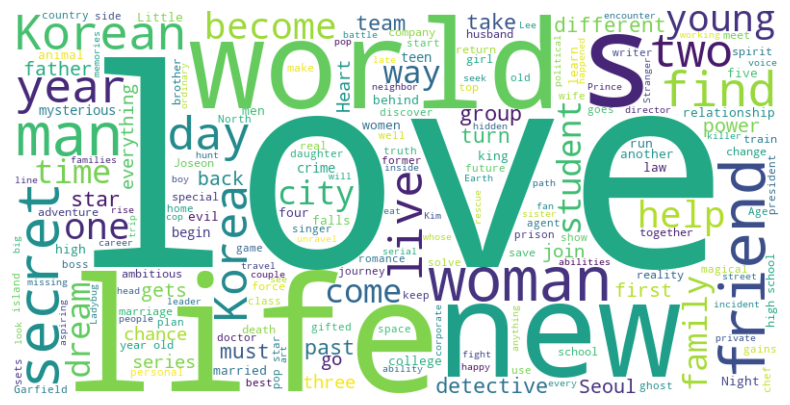

In [55]:
# Combining titles and descriptions of South Korean content into a single string for the word cloud

# Filtering South Korean content
south_korean_content = netflix_data[netflix_data['country'].str.contains('South Korea', na=False)]

# Combining titles and descriptions
all_titles_descriptions_korean = ' '.join(south_korean_content['title'] + ' ' + south_korean_content['description'])

# Generating the word cloud for South Korean content
wordcloud_korean = WordCloud(width=800, height=400, background_color='white').generate(all_titles_descriptions_korean)

# Displaying the word cloud for South Korean content
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_korean, interpolation='bilinear')
plt.axis('off')
plt.show()


### ANALYSIS HERE